# **INTRODUCTION**

I chose Apple, Microsoft, Amazon, Google and Tesla as the five large-cap US companies whose stocks I analyzed for my project. The link to the dataset I worked with is attached below. I did my project in the following steps:

1. Data Access

2. Data Cleaning

3. Data Transformation

4. Data Analysis

Link: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

## **DATA ACCESS**





Here, I have created a data frame comprising the data of stocks of my chosen companies, with ticker being the outer index and date being the inner index. I have sorted the data in a descending manner, and converted the data in date column to DateTime format.

In [481]:
import pandas as pd
tickers = ['aapl', 'amzn', 'googl', 'msft', 'tsla']
dfs = []
for ticker in tickers:
    file_path = f"{ticker}.us.txt"
    try:
      df = pd.read_csv(file_path)
      df['ticker'] = ticker
      df['date'] = pd.to_datetime(df['Date'])
      df = df[['date', 'ticker', 'Open', 'High', 'Low', 'Close', 'Volume','OpenInt']]
      df.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume','Open Interest']
      dfs.append(df)
    except Exception as e:
      print(f"Error: {e}")
combined_df = pd.concat(dfs)
multiindex_df = combined_df.set_index(['Ticker', 'Date']).sort_index(ascending = False)
multiindex_df

Open       High        Low      Close    Volume  \
Ticker Date                                                               
tsla   2017-11-10  302.50000  308.36000  301.85000  302.99000   4621912   
       2017-11-09  302.50000  304.46000  296.30000  302.99000   5440335   
       2017-11-08  305.50000  306.89000  301.30000  304.31000   4725510   
       2017-11-07  301.02000  306.50000  300.03000  306.05000   5286320   
       2017-11-06  307.00000  307.50000  299.01000  302.78000   6482486   
...                      ...        ...        ...        ...       ...   
aapl   1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
       1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
       1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
       1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
       1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   

                   Open Interest  
Ticker Date                       
tsla   2017-11-10              0  
       2017-11-09              0  
       2017-11-08              0  
       2017-11-07              0  
       2017-11-06              0  
...                          ...  
aapl   1984-09-13              0  
       1984-09-12              0  
       1984-09-11              0  
       1984-09-10              0  
       1984-09-07              0  

[26691 rows x 6 columns]

## **DATA CLEANING**


First, I checked for any missing rows across the tickers. Since there were none, I then looked for duplicates. I found only six duplicates outside the range of the years we needed to study, so I removed them. Next, I examined the columns for any that contained only one value, as these would be redundant. I also dropped those columns and checked for any columns with multiple data types that needed attention; there were none. Therefore, I filtered the data to include only the past 10 years, removed the other outliers, and proceeded with my analysis.

In [482]:
multiindex_df.shape

(26691, 6)

In [483]:
multiindex_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


In [484]:
duplicate_rows = multiindex_df[multiindex_df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
                      Open     High      Low    Close    Volume  Open Interest
Ticker Date                                                                   
msft   1986-09-16  0.07533  0.07533  0.07533  0.07533   6889952              0
       1986-07-07  0.08389  0.08389  0.07533  0.07533  18679429              0
       1986-07-03  0.08389  0.08389  0.08389  0.08389  18794263              0
       1986-05-15  0.08389  0.08389  0.08389  0.08389   5052632              0
       1986-04-24  0.07533  0.08389  0.07533  0.08389  82870827              0
       1986-04-09  0.07533  0.07533  0.07533  0.07533  16153115              0


In [485]:
multiindex_df.drop_duplicates(inplace = True)

In [486]:
for column in multiindex_df.columns:
  unique_values = multiindex_df[column].unique()
  print(f"Column '{column}': {len(unique_values)} unique values")

Column 'Open': 16297 unique values
Column 'High': 16188 unique values
Column 'Low': 16280 unique values
Column 'Close': 16651 unique values
Column 'Volume': 26120 unique values
Column 'Open Interest': 1 unique values


In [487]:
multiindex_df = multiindex_df.drop(columns=['Open Interest'])
multiindex_df

Open       High        Low      Close    Volume
Ticker Date                                                            
tsla   2017-11-10  302.50000  308.36000  301.85000  302.99000   4621912
       2017-11-09  302.50000  304.46000  296.30000  302.99000   5440335
       2017-11-08  305.50000  306.89000  301.30000  304.31000   4725510
       2017-11-07  301.02000  306.50000  300.03000  306.05000   5286320
       2017-11-06  307.00000  307.50000  299.01000  302.78000   6482486
...                      ...        ...        ...        ...       ...
aapl   1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062
       1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801
       1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199
       1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532
       1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030

[26685 rows x 5 columns]

In [488]:
def check_datatypes(df):
    print("Data types of DataFrame columns:")
    print(df.dtypes)
    if isinstance(df.index, pd.MultiIndex):
        print("\nData types of MultiIndex levels:")
        for i, level_name in enumerate(df.index.names):
            print(f"Level '{level_name}': {df.index.get_level_values(i).dtype}")
check_datatypes(multiindex_df)

Data types of DataFrame columns:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

Data types of MultiIndex levels:
Level 'Ticker': object
Level 'Date': datetime64[ns]


In [489]:
import datetime
filtered_dfs = []
for ticker in tickers:
    try:
        df_ticker = multiindex_df.loc[ticker]
        latest_date = df_ticker.index.max()
        date_10_years_ago = latest_date - pd.DateOffset(years=10)
        df_filtered_ticker = df_ticker[(df_ticker.index <= latest_date) & (df_ticker.index >= date_10_years_ago)]
        filtered_dfs.append(df_filtered_ticker)
    except KeyError:
        print(f"Ticker '{ticker}' not found in the DataFrame index.")
    except Exception as e:
        print(f"An error occurred for ticker '{ticker}': {e}")
filtered_df = pd.concat(filtered_dfs, keys=tickers, names=['Ticker', 'Date'])
filtered_df

Open    High     Low   Close    Volume
Ticker Date                                                
aapl   2017-11-10  175.11  175.38  174.27  174.67  25130494
       2017-11-09  174.48  175.46  172.52  175.25  29533086
       2017-11-08  174.03  175.61  173.71  175.61  24451166
       2017-11-07  173.29  174.51  173.29  174.18  24424877
       2017-11-06  171.75  174.36  171.10  173.63  34901241
...                   ...     ...     ...     ...       ...
tsla   2010-07-02   23.00   23.10   18.71   19.20   5141807
       2010-07-01   25.00   25.92   20.27   21.96   8229863
       2010-06-30   25.79   30.42   23.30   23.83  17194394
       2010-06-29   19.00   25.00   17.54   23.89  18783276
       2010-06-28   17.00   17.00   17.00   17.00         0

[11934 rows x 5 columns]

In [490]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
filtered_df = remove_outliers_iqr(filtered_df, 'Close')
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10980 entries, ('aapl', Timestamp('2017-11-10 00:00:00')) to ('tsla', Timestamp('2010-06-28 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10980 non-null  float64
 1   High    10980 non-null  float64
 2   Low     10980 non-null  float64
 3   Close   10980 non-null  float64
 4   Volume  10980 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 545.6+ KB


## **DATA TRANSFORMATION**

For each stock, I added the following columns:
1. Daily Return: % change in closing price
2. 7-day Moving Average of closing price
3. 30-day Moving Average of closing price
4. Rolling Volatility (30d): Standard deviation of returns over the last 30 days

In [491]:
filtered_df = filtered_df.copy()
filtered_df_sorted = filtered_df.sort_index(level=['Ticker', 'Date'], ascending=[True, True])
filtered_df_sorted['Daily Return'] = filtered_df_sorted.groupby('Ticker')['Close'].pct_change() * 100
filtered_df_sorted

Open     High      Low    Close     Volume  Daily Return
Ticker Date                                                                   
aapl   2007-11-12   21.130   21.479   19.291   19.691  492362604           NaN
       2007-11-13   20.615   21.897   19.691   21.765  484373501     10.532731
       2007-11-14   22.733   22.739   20.970   21.274  403585172     -2.255915
       2007-11-15   21.280   21.717   20.528   21.040  414487458     -1.099934
       2007-11-16   21.193   21.388   20.405   21.309  385660112      1.278517
...                    ...      ...      ...      ...        ...           ...
tsla   2017-11-06  307.000  307.500  299.010  302.780    6482486     -1.081381
       2017-11-07  301.020  306.500  300.030  306.050    5286320      1.079992
       2017-11-08  305.500  306.890  301.300  304.310    4725510     -0.568535
       2017-11-09  302.500  304.460  296.300  302.990    5440335     -0.433768
       2017-11-10  302.500  308.360  301.850  302.990    4621912      0.000000

[10980 rows x 6 columns]

In [492]:
filtered_df_sorted['7-Day Moving Average'] = (
    filtered_df_sorted.groupby('Ticker')['Close']
    .transform(lambda x: x.rolling(window=7).mean())
)
filtered_df_sorted['30-Day Moving Average'] = (
    filtered_df_sorted.groupby('Ticker')['Close']
    .transform(lambda x: x.rolling(window=30).mean())
)
filtered_df_sorted['Rolling Volatility (30d)'] = (
    filtered_df_sorted.groupby('Ticker')['Daily Return']
    .transform(lambda x: x.rolling(window=30).std())
)
filtered_df_sorted

Open     High      Low    Close     Volume  \
Ticker Date                                                        
aapl   2007-11-12   21.130   21.479   19.291   19.691  492362604   
       2007-11-13   20.615   21.897   19.691   21.765  484373501   
       2007-11-14   22.733   22.739   20.970   21.274  403585172   
       2007-11-15   21.280   21.717   20.528   21.040  414487458   
       2007-11-16   21.193   21.388   20.405   21.309  385660112   
...                    ...      ...      ...      ...        ...   
tsla   2017-11-06  307.000  307.500  299.010  302.780    6482486   
       2017-11-07  301.020  306.500  300.030  306.050    5286320   
       2017-11-08  305.500  306.890  301.300  304.310    4725510   
       2017-11-09  302.500  304.460  296.300  302.990    5440335   
       2017-11-10  302.500  308.360  301.850  302.990    4621912   

                   Daily Return  7-Day Moving Average  30-Day Moving Average  \
Ticker Date                                                                    
aapl   2007-11-12           NaN                   NaN                    NaN   
       2007-11-13     10.532731                   NaN                    NaN   
       2007-11-14     -2.255915                   NaN                    NaN   
       2007-11-15     -1.099934                   NaN                    NaN   
       2007-11-16      1.278517                   NaN                    NaN   
...                         ...                   ...                    ...   
tsla   2017-11-06     -1.081381            314.527143             339.294800   
       2017-11-07      1.079992            312.410000             337.988133   
       2017-11-08     -0.568535            310.157143             336.766133   
       2017-11-09     -0.433768            306.080000             335.545800   
       2017-11-10      0.000000            303.495714             334.278133   

                   Rolling Volatility (30d)  
Ticker Date                                  
aapl   2007-11-12                       NaN  
       2007-11-13                       NaN  
       2007-11-14                       NaN  
       2007-11-15                       NaN  
       2007-11-16                       NaN  
...                                     ...  
tsla   2017-11-06                  2.216589  
       2017-11-07                  2.231713  
       2017-11-08                  2.226119  
       2017-11-09                  2.226150  
       2017-11-10                  2.222447  

[10980 rows x 9 columns]

Then, I answered the following questions:

1.  Which stock had the highest average return over the 10 years?
2.  Which stock had the most volatile month, and when?

In [493]:
average_returns = filtered_df_sorted.groupby('Ticker')['Daily Return'].mean()
highest_avg_return_stock = average_returns.idxmax()
print(f"The stock with the highest average return over the 10-year period is: {highest_avg_return_stock}")
print(f"Average returns:\n{average_returns}")

The stock with the highest average return over the 10-year period is: tsla
Average returns:
Ticker
aapl     0.106375
amzn     0.134835
googl    0.056440
msft     0.058938
tsla     0.210083
Name: Daily Return, dtype: float64


In [494]:
volatility_unstacked = filtered_df_sorted['Rolling Volatility (30d)'].unstack(level='Ticker')
monthly_volatility = volatility_unstacked.resample('M').mean()
average_monthly_volatility_across_tickers = monthly_volatility.mean(axis=1)
most_volatile_month_date = average_monthly_volatility_across_tickers.idxmax()
volatility_in_most_volatile_month = monthly_volatility.loc[most_volatile_month_date]
most_volatile_stock_in_month = volatility_in_most_volatile_month.dropna().idxmax()
print(f"\nThe stock with the most volatile month was {most_volatile_stock_in_month}.")
print(f"This occurred in {most_volatile_month_date.strftime('%B %Y')}.")
print(f"The average rolling volatility across all stocks in that month was: {average_monthly_volatility_across_tickers.max():.2f}")
print(f"The rolling volatility of {most_volatile_stock_in_month} in that month was: {volatility_in_most_volatile_month.max():.2f}")


The stock with the most volatile month was amzn.
This occurred in November 2008.
The average rolling volatility across all stocks in that month was: 5.72
The rolling volatility of amzn in that month was: 6.45


Daily returns are calculated assuming markets are liquid, meaning there are no gaps between closing prices. Rolling volatility, a key metric in our analysis, is based on the assumption that returns are typically distributed over 30-day periods. This period is crucial in understanding the market dynamics and reassures the thoroughness of our analysis. Please note that this analysis does not consider factors such as dividend payments, stock splits, or after-hours trading, which could impact return calculations.

After performing an exploratory analysis of the given data, I found out that:


1.  The stock with the highest average return over the 10 years was TSLA.
2.  The stock with the most volatile month was AMZN in November 2008.

Then I proceeded to add some more features to my column, convert the categorical values, check for skewness of my dataset and restructured my dataset.

In [495]:
skewness = filtered_df_sorted['Close'].skew()
print(f"Skewness of the 'Close' column: {skewness}")
if skewness > 0:
    print("The 'Close' column is right-skewed (positive skewness).")
elif skewness < 0:
    print("The 'Close' column is left-skewed (negative skewness).")
else:
    print("The 'Close' column is not skewed (or very close to symmetrical).")

Skewness of the 'Close' column: 1.2505667180241913
The 'Close' column is right-skewed (positive skewness).


In [496]:
import numpy as np
filtered_df_sorted['Close_Log'] = np.log(filtered_df_sorted['Close'])
skewness = filtered_df_sorted['Close_Log'].skew()
print(f"Skewness of the 'Close_Log' column: {skewness}")
if skewness > 0:
    print("The 'Close_Log' column is right-skewed (positive skewness).")
elif skewness < 0:
    print("The 'Close_Log' column is left-skewed (negative skewness).")
else:
    print("The 'Close_Log' column is not skewed (or very close to symmetrical).")

Skewness of the 'Close_Log' column: -0.031109674242157298
The 'Close_Log' column is left-skewed (negative skewness).


In [497]:
filtered_df_sorted['Year'] = filtered_df_sorted.index.get_level_values('Date').year
filtered_df_sorted['Month'] = filtered_df_sorted.index.get_level_values('Date').month
filtered_df_sorted['Day'] = filtered_df_sorted.index.get_level_values('Date').dayofyear
filtered_df_sorted['Day_of_Week'] = filtered_df_sorted.index.get_level_values('Date').dayofweek
filtered_df_sorted['Number_of_Days'] = (filtered_df_sorted.index.get_level_values('Date') - filtered_df_sorted.index.get_level_values('Date').min()).days
filtered_df_sorted

Open     High      Low    Close     Volume  \
Ticker Date                                                        
aapl   2007-11-12   21.130   21.479   19.291   19.691  492362604   
       2007-11-13   20.615   21.897   19.691   21.765  484373501   
       2007-11-14   22.733   22.739   20.970   21.274  403585172   
       2007-11-15   21.280   21.717   20.528   21.040  414487458   
       2007-11-16   21.193   21.388   20.405   21.309  385660112   
...                    ...      ...      ...      ...        ...   
tsla   2017-11-06  307.000  307.500  299.010  302.780    6482486   
       2017-11-07  301.020  306.500  300.030  306.050    5286320   
       2017-11-08  305.500  306.890  301.300  304.310    4725510   
       2017-11-09  302.500  304.460  296.300  302.990    5440335   
       2017-11-10  302.500  308.360  301.850  302.990    4621912   

                   Daily Return  7-Day Moving Average  30-Day Moving Average  \
Ticker Date                                                                    
aapl   2007-11-12           NaN                   NaN                    NaN   
       2007-11-13     10.532731                   NaN                    NaN   
       2007-11-14     -2.255915                   NaN                    NaN   
       2007-11-15     -1.099934                   NaN                    NaN   
       2007-11-16      1.278517                   NaN                    NaN   
...                         ...                   ...                    ...   
tsla   2017-11-06     -1.081381            314.527143             339.294800   
       2017-11-07      1.079992            312.410000             337.988133   
       2017-11-08     -0.568535            310.157143             336.766133   
       2017-11-09     -0.433768            306.080000             335.545800   
       2017-11-10      0.000000            303.495714             334.278133   

                   Rolling Volatility (30d)  Close_Log  Year  Month  Day  \
Ticker Date                                                                
aapl   2007-11-12                       NaN   2.980162  2007     11  316   
       2007-11-13                       NaN   3.080303  2007     11  317   
       2007-11-14                       NaN   3.057486  2007     11  318   
       2007-11-15                       NaN   3.046425  2007     11  319   
       2007-11-16                       NaN   3.059130  2007     11  320   
...                                     ...        ...   ...    ...  ...   
tsla   2017-11-06                  2.216589   5.713006  2017     11  310   
       2017-11-07                  2.231713   5.723748  2017     11  311   
       2017-11-08                  2.226119   5.718047  2017     11  312   
       2017-11-09                  2.226150   5.713700  2017     11  313   
       2017-11-10                  2.222447   5.713700  2017     11  314   

                   Day_of_Week  Number_of_Days  
Ticker Date                                     
aapl   2007-11-12            0               0  
       2007-11-13            1               1  
       2007-11-14            2               2  
       2007-11-15            3               3  
       2007-11-16            4               4  
...                        ...             ...  
tsla   2017-11-06            0            3647  
       2017-11-07            1            3648  
       2017-11-08            2            3649  
       2017-11-09            3            3650  
       2017-11-10            4            3651  

[10980 rows x 15 columns]

In [498]:
filtered_df_sorted["Price Change"] = filtered_df_sorted["Close"] - filtered_df_sorted["Open"]
filtered_df_sorted["High-Low Spread"] = filtered_df_sorted["High"] - filtered_df_sorted["Low"]
filtered_df_sorted["Intraday Volatility %"] = (filtered_df_sorted["High"] - filtered_df_sorted["Low"]) / filtered_df_sorted["Open"] * 100
filtered_df_sorted["Lag_1_Daily_Return"] = filtered_df_sorted["Daily Return"].shift(1)
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))
filtered_df_sorted["RSI_14"] = compute_rsi(filtered_df_sorted["Close"], 14)
exp1 = filtered_df_sorted["Close"].ewm(span=12, adjust=False).mean()
exp2 = filtered_df_sorted["Close"].ewm(span=26, adjust=False).mean()
filtered_df_sorted["MACD"] = exp1 - exp2
filtered_df_sorted["Volume_Change"] = filtered_df_sorted["Volume"].pct_change()
filtered_df_sorted["Volume_Price_Ratio"] = filtered_df_sorted["Volume"] / filtered_df_sorted["Close"]

In [499]:
for col in filtered_df_sorted.columns:
  print(f"Number of unique values in {col} are: {filtered_df_sorted[col].nunique()}")

Number of unique values in Open are: 9670
Number of unique values in High are: 9581
Number of unique values in Low are: 9667
Number of unique values in Close are: 9824
Number of unique values in Volume are: 10970
Number of unique values in Daily Return are: 10912
Number of unique values in 7-Day Moving Average are: 10852
Number of unique values in 30-Day Moving Average are: 10817
Number of unique values in Rolling Volatility (30d) are: 10830
Number of unique values in Close_Log are: 9824
Number of unique values in Year are: 11
Number of unique values in Month are: 12
Number of unique values in Day are: 365
Number of unique values in Day_of_Week are: 5
Number of unique values in Number_of_Days are: 2519
Number of unique values in Price Change are: 5798
Number of unique values in High-Low Spread are: 5226
Number of unique values in Intraday Volatility % are: 10973
Number of unique values in Lag_1_Daily_Return are: 10912
Number of unique values in RSI_14 are: 10941
Number of unique values

In [500]:
cols = [col for col in filtered_df_sorted.columns if (col != 'Close' and col != 'Close_Log')] + ['Close'] + ['Close_Log']
final_df = filtered_df_sorted[cols]
final_df.to_csv('stock_data.csv')
final_df

Open     High      Low     Volume  Daily Return  \
Ticker Date                                                             
aapl   2007-11-12   21.130   21.479   19.291  492362604           NaN   
       2007-11-13   20.615   21.897   19.691  484373501     10.532731   
       2007-11-14   22.733   22.739   20.970  403585172     -2.255915   
       2007-11-15   21.280   21.717   20.528  414487458     -1.099934   
       2007-11-16   21.193   21.388   20.405  385660112      1.278517   
...                    ...      ...      ...        ...           ...   
tsla   2017-11-06  307.000  307.500  299.010    6482486     -1.081381   
       2017-11-07  301.020  306.500  300.030    5286320      1.079992   
       2017-11-08  305.500  306.890  301.300    4725510     -0.568535   
       2017-11-09  302.500  304.460  296.300    5440335     -0.433768   
       2017-11-10  302.500  308.360  301.850    4621912      0.000000   

                   7-Day Moving Average  30-Day Moving Average  \
Ticker Date                                                      
aapl   2007-11-12                   NaN                    NaN   
       2007-11-13                   NaN                    NaN   
       2007-11-14                   NaN                    NaN   
       2007-11-15                   NaN                    NaN   
       2007-11-16                   NaN                    NaN   
...                                 ...                    ...   
tsla   2017-11-06            314.527143             339.294800   
       2017-11-07            312.410000             337.988133   
       2017-11-08            310.157143             336.766133   
       2017-11-09            306.080000             335.545800   
       2017-11-10            303.495714             334.278133   

                   Rolling Volatility (30d)  Year  Month  ...  Price Change  \
Ticker Date                                               ...                 
aapl   2007-11-12                       NaN  2007     11  ...        -1.439   
       2007-11-13                       NaN  2007     11  ...         1.150   
       2007-11-14                       NaN  2007     11  ...        -1.459   
       2007-11-15                       NaN  2007     11  ...        -0.240   
       2007-11-16                       NaN  2007     11  ...         0.116   
...                                     ...   ...    ...  ...           ...   
tsla   2017-11-06                  2.216589  2017     11  ...        -4.220   
       2017-11-07                  2.231713  2017     11  ...         5.030   
       2017-11-08                  2.226119  2017     11  ...        -1.190   
       2017-11-09                  2.226150  2017     11  ...         0.490   
       2017-11-10                  2.222447  2017     11  ...         0.490   

                   High-Low Spread  Intraday Volatility %  Lag_1_Daily_Return  \
Ticker Date                                                                     
aapl   2007-11-12            2.188              10.354946                 NaN   
       2007-11-13            2.206              10.700946                 NaN   
       2007-11-14            1.769               7.781639           10.532731   
       2007-11-15            1.189               5.587406           -2.255915   
       2007-11-16            0.983               4.638324           -1.099934   
...                            ...                    ...                 ...   
tsla   2017-11-06            8.490               2.765472            2.282296   
       2017-11-07            6.470               2.149359           -1.081381   
       2017-11-08            5.590               1.829787            1.079992   
       2017-11-09            8.160               2.697521           -0.568535   
       2017-11-10            6.510               2.152066           -0.433768   

                      RSI_14       MACD  Volume_Change  Volume_Price_Ratio  \
Ticker Date                                          

## **EXPLORATORY DATA ANALYSIS**

While this analysis focuses on quantitative metrics, visualizations (e.g., moving average trends or volatility time series) could further illustrate patterns like Tesla's consistent outperformance or Amazon's volatility spikes during the 2008 financial crisis. Thus, I have provided some visual representations to explain the above patterns in this section, to make my explanations and assessments of the given data clear, and to ease the understanding of the data to the reader. I have also analyzed other stuff like the correlation matrix and skewness of the close column.

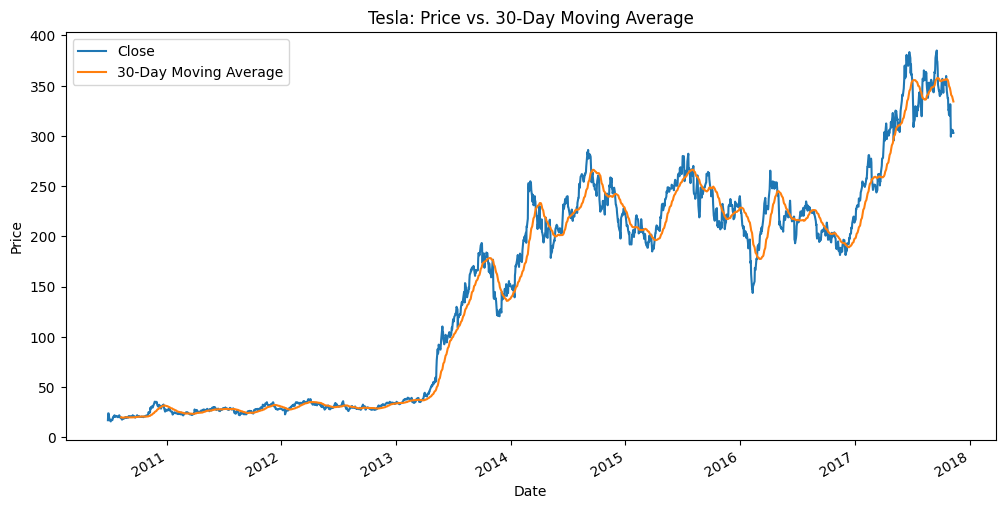

In [501]:
import matplotlib.pyplot as plt
tsla_data = filtered_df_sorted.loc['tsla']
tsla_data.plot(y=['Close', '30-Day Moving Average'], figsize=(12, 6))
plt.title('Tesla: Price vs. 30-Day Moving Average')
plt.ylabel('Price')
plt.show()

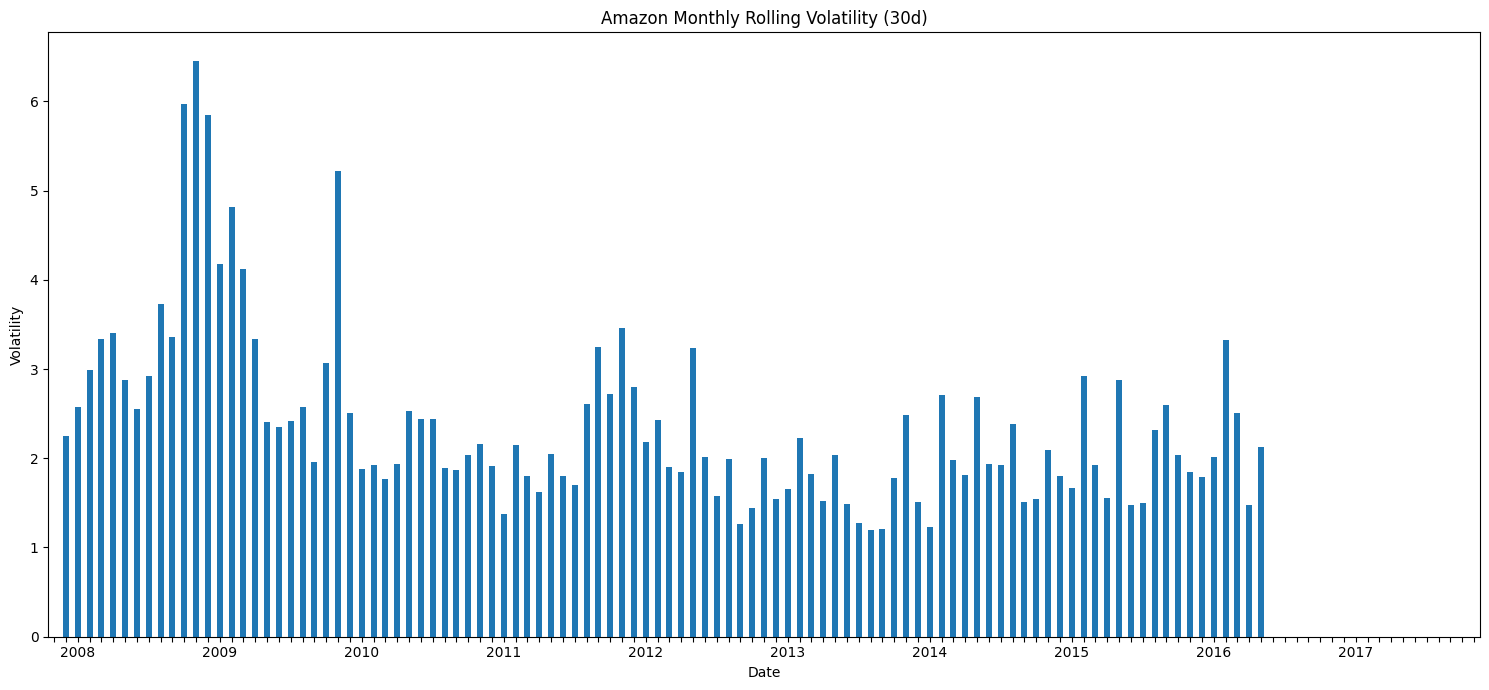

In [502]:
amzn_monthly_volatility = monthly_volatility['amzn']
plt.figure(figsize=(15, 7))
amzn_monthly_volatility.plot(kind='bar')
plt.title('Amazon Monthly Rolling Volatility (30d)')
plt.xlabel('Date')
plt.ylabel('Volatility')
labels = [date.strftime('%Y') if date.month == 1 else '' for date in amzn_monthly_volatility.index]
plt.xticks(range(len(amzn_monthly_volatility.index)), labels, rotation=0)
plt.tight_layout()
plt.show()

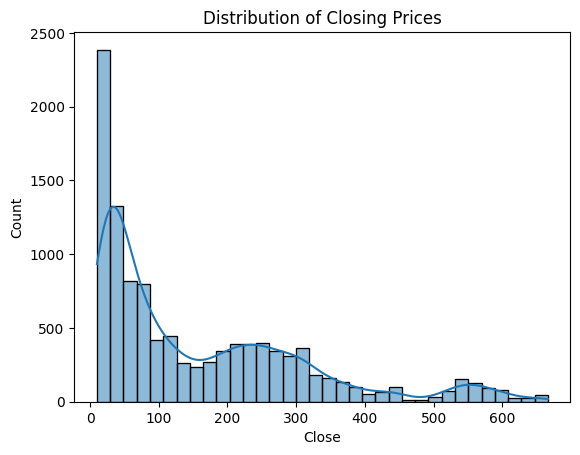

Skewness of Close: 1.2503958690928683


In [503]:
import seaborn as sns
sns.histplot(filtered_df_sorted['Close'], kde=True)
plt.title("Distribution of Closing Prices")
plt.show()
from scipy.stats import skew
print("Skewness of Close:", skew(filtered_df_sorted['Close']))

In [504]:
print("\nCorrelation with 'Close_Log':")
print(filtered_df_sorted.corr()['Close_Log'].sort_values(ascending=False))


Correlation with 'Close_Log':
Close_Log                   1.000000
High                        0.906936
Close                       0.906418
7-Day Moving Average        0.906217
Open                        0.906071
Low                         0.905624
30-Day Moving Average       0.905217
High-Low Spread             0.712607
Number_of_Days              0.387627
Year                        0.385876
MACD                        0.138741
RSI_14                      0.046676
Daily Return                0.010061
Lag_1_Daily_Return          0.009652
Month                       0.002058
Day                         0.001691
Day_of_Week                 0.000064
Volume_Change              -0.005724
Price Change               -0.014489
Intraday Volatility %      -0.130601
Rolling Volatility (30d)   -0.133094
Volume_Price_Ratio         -0.500880
Volume                     -0.539513
Name: Close_Log, dtype: float64


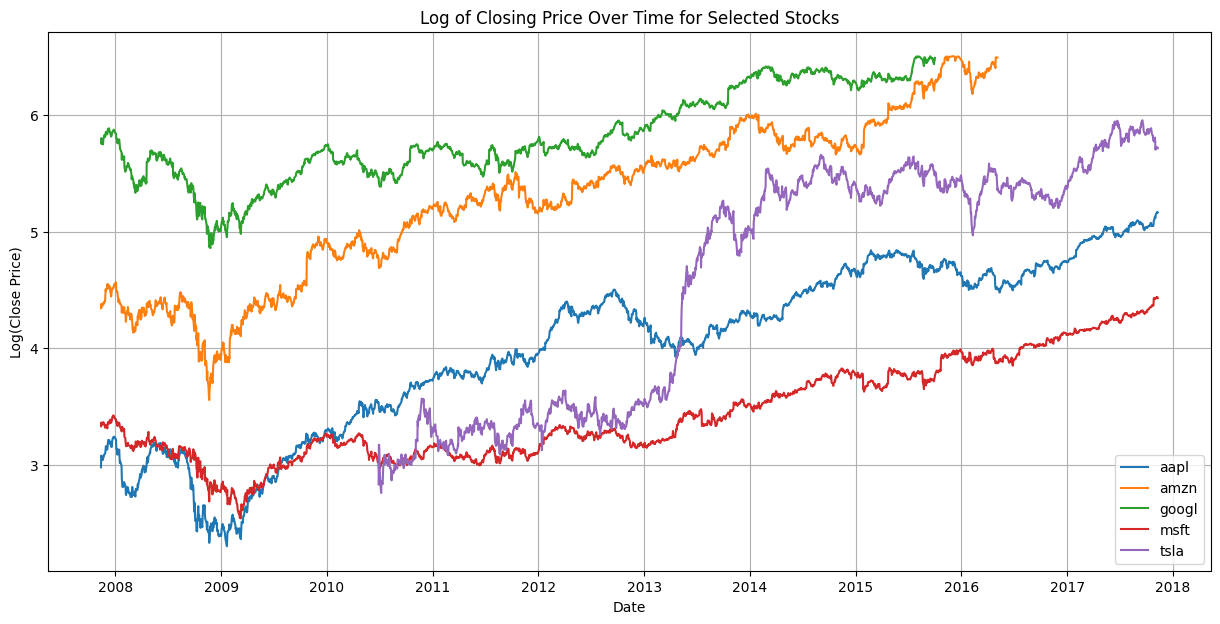

In [505]:
plt.figure(figsize=(15, 7))
for ticker in tickers:
    try:
        df_ticker = filtered_df_sorted.loc[ticker].sort_index(ascending=True)
        plt.plot(df_ticker.index.get_level_values('Date'), df_ticker['Close_Log'], label=ticker)
    except KeyError:
        print(f"Data for ticker '{ticker}' not found.")

plt.title('Log of Closing Price Over Time for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Log(Close Price)')
plt.legend()
plt.grid(True)
plt.show()

## **MODEL IMPLEMENTATION AND EVALUATION**

### **DATA SPLITTING**

> I chose AAPL as the stock to test my model. I split the data into the training (first 80%) and testing (last 20%) sets, ensuring the split respects the time order.



In [506]:
features_random_forest = [
    'Open', 'High', 'Low',
    '7-Day Moving Average', '30-Day Moving Average',
    'High-Low Spread', 'MACD',
    'Rolling Volatility (30d)', 'Intraday Volatility %',
    'Volume', 'Volume_Price_Ratio',
    'Number_of_Days', 'Year'
]
features_linear_regressor = ['Open', '7-Day Moving Average', 'High-Low Spread', 'MACD', 'Volume', 'Volume_Price_Ratio']
aapl_df = final_df.loc['aapl'].copy()
aapl_df = aapl_df[aapl_df['Close'] > 0]
aapl_df.dropna(subset=features_random_forest, inplace=True)
aapl_df['Close_Log'] = np.log(aapl_df['Close'])
aapl_df.dropna(subset=['Close_Log'], inplace=True)
aapl_df.reset_index(inplace=True)
train_size = int(len(aapl_df) * 0.8)
train_df = aapl_df.iloc[:train_size]
test_df = aapl_df.iloc[train_size:]

### **MODEL IMPLEMENTATION AND EVALUATION**

> I implemented three models, linear regression, ARIMA, and random forest, and evaluated them. Evaluation would be done using Mean Absolute Error (MAE) and accuracy for direction prediction (whether the price goes up or down).

LINEAR REGRESSION

> I will predict the next day's closing price using the past 5 days' closing prices as features.

In [507]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = train_df[features_linear_regressor]
y_train = train_df["Close_Log"]
X_test = test_df[features_linear_regressor]
y_test = test_df["Close_Log"]
X_train_scaled = scaler.fit_transform(train_df[features_linear_regressor])
X_test_scaled = scaler.transform(test_df[features_linear_regressor])
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(train_df[['Close_Log']])
y_test_scaled = y_scaler.transform(test_df[['Close_Log']])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_linear_regressor)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_linear_regressor)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=['Close_Log'])
y_test_scaled = pd.DataFrame(y_test_scaled, columns=['Close_Log'])

In [508]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
def create_lagged_features(df, lag=5):
    df_lagged = df.copy()
    for i in range(1, lag + 1):
        df_lagged[f'Close_Lag_{i}'] = df_lagged['Close_Log'].shift(i)
    df_lagged.dropna(inplace=True)
    return df_lagged
original_test_index = test_df.index.copy()
test_df_reset = test_df.reset_index(drop=True)
train_df_lagged = create_lagged_features(pd.concat([X_train_scaled, y_train_scaled], axis=1), lag=5)
test_df_lagged = create_lagged_features(pd.concat([X_test_scaled, y_test_scaled], axis=1), lag=5)
lagged_features = [f'Close_Lag_{i}' for i in range(1, 6)]
X_train_lagged = train_df_lagged[lagged_features]
y_train_lagged = train_df_lagged['Close_Log']
X_test_lagged = test_df_lagged[lagged_features]
y_test_lagged = test_df_lagged['Close_Log']
lr_model = LinearRegression()
lr_model.fit(X_train_lagged, y_train_lagged)
y_pred_scaled = lr_model.predict(X_test_lagged)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = y_scaler.inverse_transform(y_test_lagged.values.reshape(-1, 1))
mae = mean_absolute_error(y_test_actual, y_pred)
print(f"Linear Regression MAE (using past 5 days' scaled close): {mae:.4f}")
test_df_aligned = test_df_reset.loc[test_df_lagged.index]
actual_prev_close = test_df_aligned['Close_Log'].shift(1).dropna()
predicted_direction = np.sign(y_pred.flatten()[1:] - actual_prev_close)
actual_direction = np.sign(test_df_aligned['Close_Log'].values[1:] - actual_prev_close)
correct_predictions = np.sum(predicted_direction == actual_direction)
accuracy = correct_predictions / len(actual_direction)
print(f"Linear Regression Direction Prediction Accuracy (using past 5 days' scaled close): {accuracy:.4f}")

Linear Regression MAE (using past 5 days' scaled close): 0.0092
Linear Regression Direction Prediction Accuracy (using past 5 days' scaled close): 0.5203


RANDOM FOREST

> I will predict the closing price using technical indicators (e.g., 7-day and 30-day moving averages, RSI) as features.


In [509]:
from sklearn.ensemble import RandomForestRegressor
target = 'Close_Log'
X_train_rf = train_df[features_random_forest].dropna()
y_train_rf = train_df.loc[X_train_rf.index, target]
X_test_rf = test_df[features_random_forest].dropna()
y_test_rf = test_df.loc[X_test_rf.index, target]
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.4f}")
actual_prev_close_rf = test_df.loc[y_test_rf.index].shift(1)[target].dropna()
aligned_y_pred_rf = pd.Series(y_pred_rf, index=y_test_rf.index).loc[actual_prev_close_rf.index]
aligned_y_test_rf = y_test_rf.loc[actual_prev_close_rf.index]
predicted_direction_rf = np.sign(aligned_y_pred_rf - actual_prev_close_rf)
actual_direction_rf = np.sign(aligned_y_test_rf - actual_prev_close_rf)
non_zero_change_indices = actual_direction_rf != 0
correct_predictions_rf = np.sum(predicted_direction_rf[non_zero_change_indices] == actual_direction_rf[non_zero_change_indices])
accuracy_rf = correct_predictions_rf / np.sum(non_zero_change_indices) if np.sum(non_zero_change_indices) > 0 else 0
print(f"Random Forest Direction Prediction Accuracy: {accuracy_rf:.4f}")

Random Forest MAE: 0.0714
Random Forest Direction Prediction Accuracy: 0.6424


ARIMA

> I will forecast the closing price using an ARIMA model.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-9715.990, Time=23.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-9711.199, Time=0.79 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-9712.037, Time=2.58 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-9711.455, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-9710.648, Time=0.37 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-9716.993, Time=18.87 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-9717.783, Time=13.70 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-9716.528, Time=11.41 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-9707.065, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-9706.406, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-9715.484, Time=8.88 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=-9714.027, Time=9.36 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-9707.200, Time=1.95 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=-9705.363, Time=2.10 sec
 

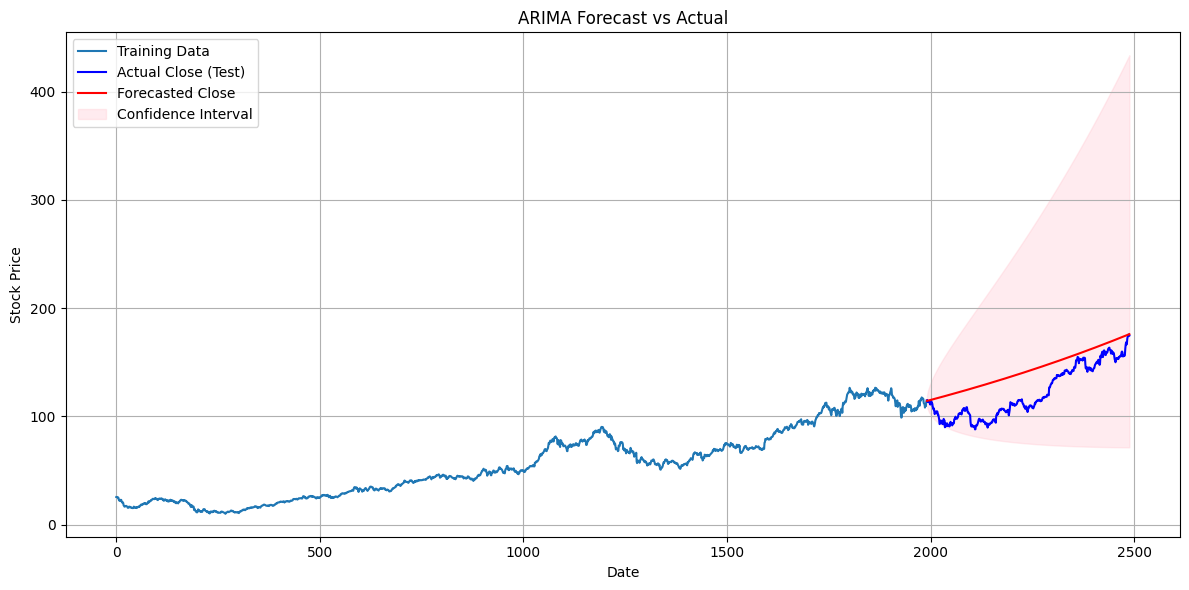

In [510]:
import pmdarima as pm
model = pm.auto_arima(train_df['Close_Log'],
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
n_periods = len(test_df)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
test_df = test_df.copy()
test_df['Forecast_Close_Log'] = forecast
test_df['Forecast_Close'] = np.exp(test_df['Forecast_Close_Log'])
test_df['Actual_Close'] = np.exp(test_df['Close_Log'])
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Before drop: test_df rows =", len(test_df))
test_df.dropna(subset=['Forecast_Close', 'Actual_Close'], inplace=True)
print("After drop: test_df rows =", len(test_df))
mae = mean_absolute_error(test_df['Actual_Close'], test_df['Forecast_Close'])
print(f"MAE: {mae:.4f}")
test_df['Actual_Direction'] = test_df['Actual_Close'].diff().apply(lambda x: 1 if x > 0 else 0)
test_df['Predicted_Direction'] = test_df['Forecast_Close'].diff().apply(lambda x: 1 if x > 0 else 0)
test_df.dropna(subset=['Actual_Direction', 'Predicted_Direction'], inplace=True)
direction_accuracy = np.mean(test_df['Actual_Direction'] == test_df['Predicted_Direction'])
print(f"Directional Accuracy: {direction_accuracy * 100:.2f}%")
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, np.exp(train_df['Close_Log']), label='Training Data')
plt.plot(test_df.index, test_df['Actual_Close'], label='Actual Close (Test)', color='blue')
plt.plot(test_df.index, test_df['Forecast_Close'], label='Forecasted Close', color='red')
plt.fill_between(test_df.index,
                  np.exp(conf_int[:, 0]),
                  np.exp(conf_int[:, 1]),
                  color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()

## **MODEL COMPARISON**

> Based on the previous data, I will compare the models based on MAE and identify the best-performing one. Then I will save it for backtesting.



In [511]:
linear_regression_mae = mae
linear_regression_accuracy = accuracy
random_forest_mae = mae_rf
random_forest_accuracy = accuracy_rf
arima_mae = mae
arima_accuracy = direction_accuracy
print("\n--- Model Comparison ---")
print(f"Linear Regression MAE: {linear_regression_mae:.4f}")
print(f"Linear Regression Direction Accuracy: {linear_regression_accuracy:.4f}")
print(f"Random Forest MAE: {random_forest_mae:.4f}")
print(f"Random Forest Direction Accuracy: {random_forest_accuracy:.4f}")
print(f"ARIMA MAE: {arima_mae:.4f}")
print(f"ARIMA Directional Accuracy: {arima_accuracy:.4f}")
best_mae_model = min([
    ('Linear Regression', linear_regression_mae),
    ('Random Forest', random_forest_mae),
    ('ARIMA', arima_mae)
], key=lambda x: x[1])

print(f"\nModel with the lowest MAE: {best_mae_model[0]} (MAE: {best_mae_model[1]:.4f})")
best_accuracy_model = max([
    ('Linear Regression', linear_regression_accuracy),
    ('Random Forest', random_forest_accuracy),
    ('ARIMA', arima_accuracy)
], key=lambda x: x[1])
print(f"Model with the highest Direction Accuracy: {best_accuracy_model[0]} (Accuracy: {best_accuracy_model[1]:.4f})")
best_overall_model_name = best_mae_model[0]
print(f"\nBased on the lowest MAE, the best performing model is: {best_overall_model_name}")


--- Model Comparison ---
Linear Regression MAE: 21.2661
Linear Regression Direction Accuracy: 0.5203
Random Forest MAE: 0.0714
Random Forest Direction Accuracy: 0.6424
ARIMA MAE: 21.2661
ARIMA Directional Accuracy: 0.5321

Model with the lowest MAE: Random Forest (MAE: 0.0714)
Model with the highest Direction Accuracy: Random Forest (Accuracy: 0.6424)

Based on the lowest MAE, the best performing model is: Random Forest


## **BACKTESTING THE BEST MODEL**

> Using the best model, I will generate buy/sell signals; buy Generate buy/sell signals: Buy if the predicted price > current price, sell otherwise. I will also Calculate the hypothetical profit/loss over the test period.



Final Strategy Profit: 200.59400000000002
Final Buy & Hold Profit: 59.80999999999999


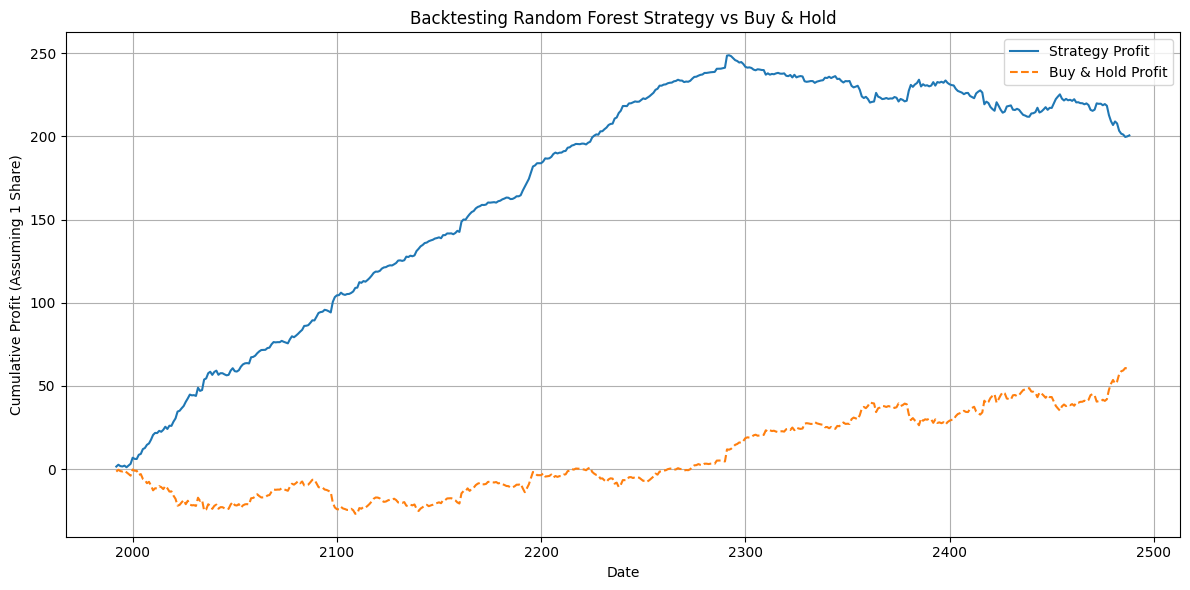

In [515]:
test_df_backtest = test_df.loc[X_test_rf.index].copy()
test_df_backtest['Predicted_Close_Log_RF'] = y_pred_rf
test_df_backtest['Predicted_Close_RF'] = np.exp(test_df_backtest['Predicted_Close_Log_RF'])
test_df_backtest['Previous_Close'] = test_df_backtest['Close'].shift(1)
test_df_backtest.dropna(subset=['Previous_Close'], inplace=True)
test_df_backtest['Signal'] = np.where(test_df_backtest['Predicted_Close_RF'] > test_df_backtest['Previous_Close'], 1, -1)
test_df_backtest['Strategy_Return'] = test_df_backtest['Signal'] * (test_df_backtest['Close'] - test_df_backtest['Previous_Close'])
test_df_backtest['Cumulative_Profit'] = test_df_backtest['Strategy_Return'].cumsum()
test_df_backtest['Buy_Hold_Profit'] = (test_df_backtest['Close'] - test_df_backtest['Previous_Close']).cumsum()
print("Final Strategy Profit:", test_df_backtest['Cumulative_Profit'].iloc[-1])
print("Final Buy & Hold Profit:", test_df_backtest['Buy_Hold_Profit'].iloc[-1])
plt.figure(figsize=(12, 6))
plt.plot(test_df_backtest.index, test_df_backtest['Cumulative_Profit'], label='Strategy Profit')
plt.plot(test_df_backtest.index, test_df_backtest['Buy_Hold_Profit'], label='Buy & Hold Profit', linestyle='--')
plt.title('Backtesting Random Forest Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit (Assuming 1 Share)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()